# Hands-on Image Processing with Python
## Chapter 7: Image Segmentation

In [33]:
# Author: Sandipan Dey

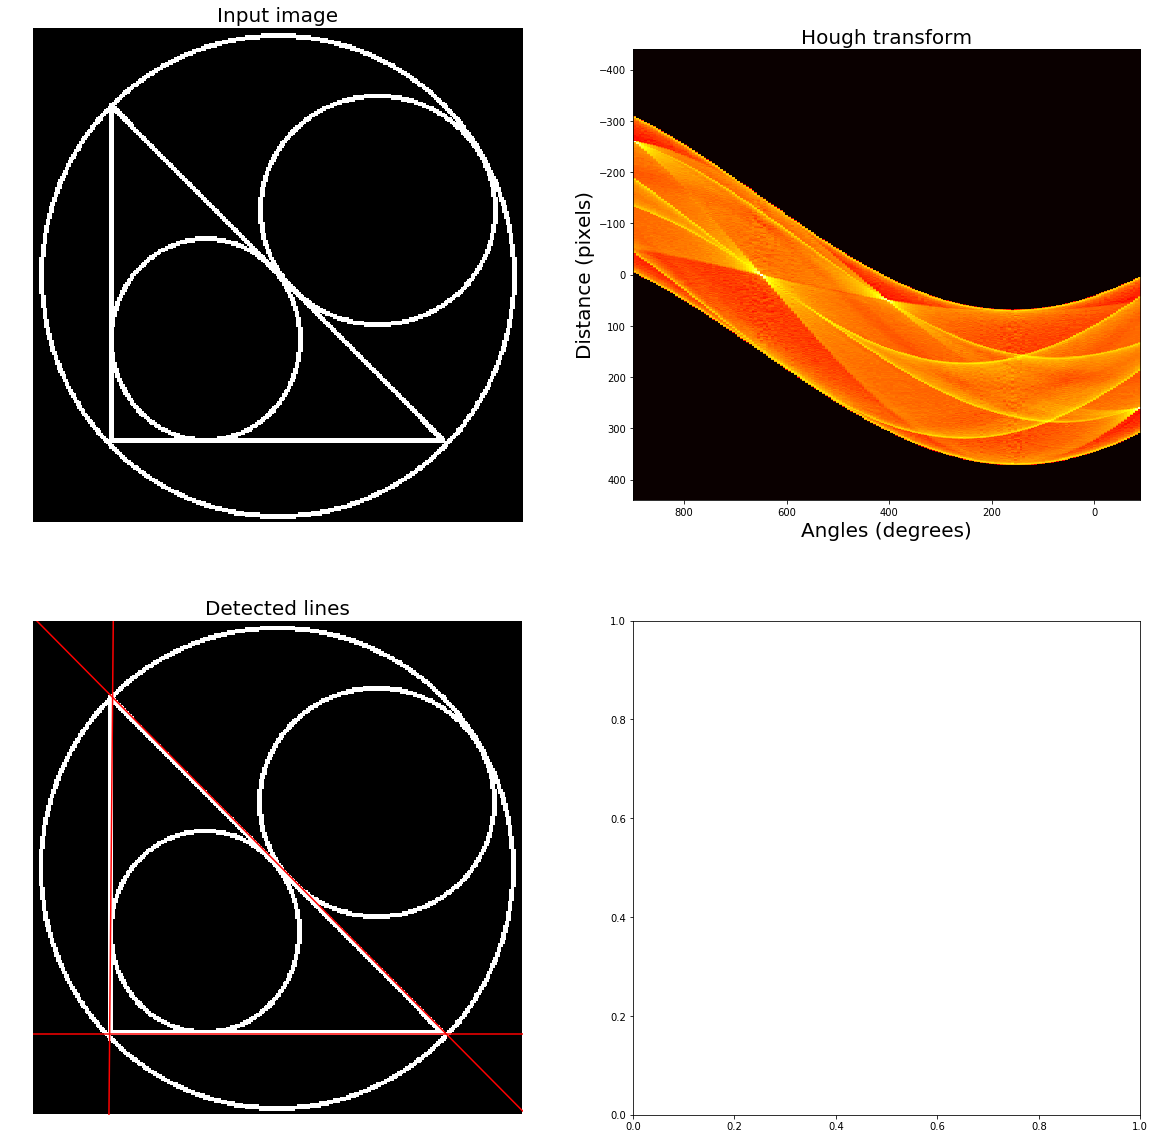

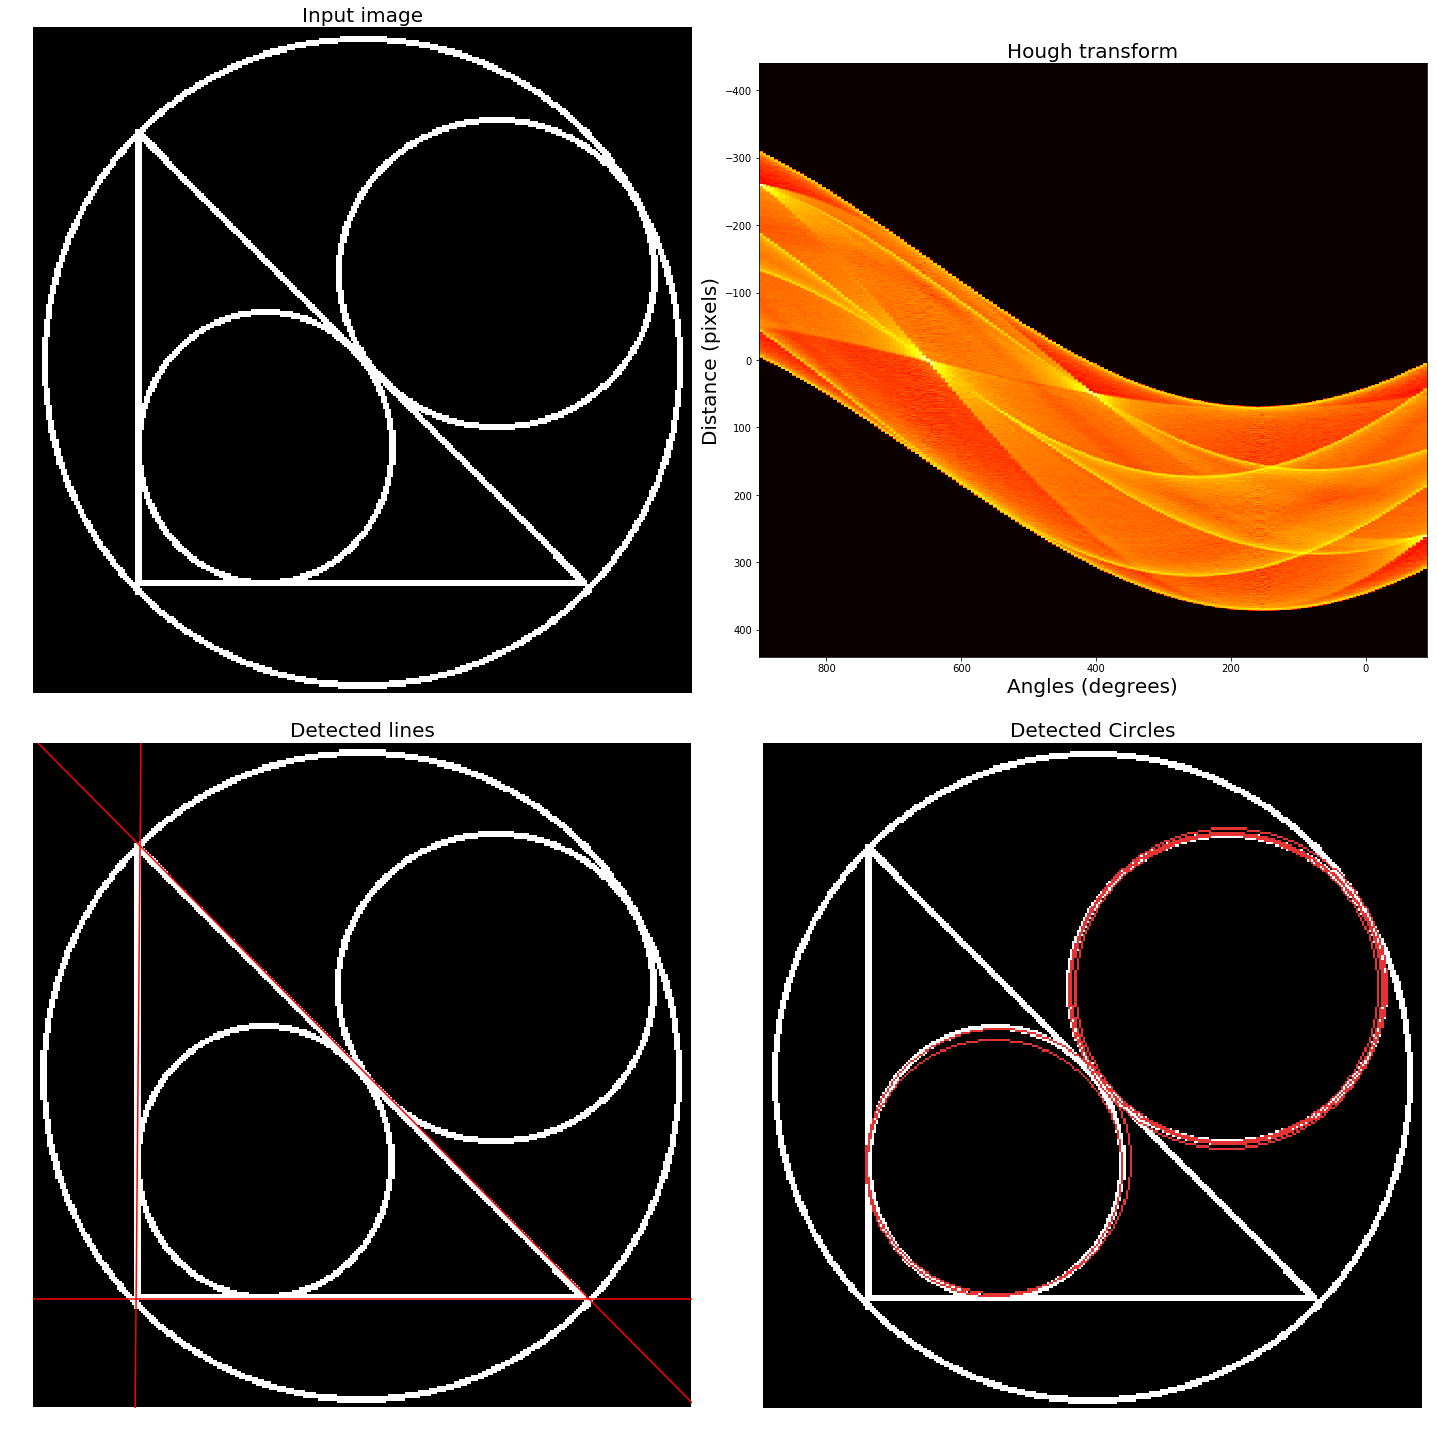

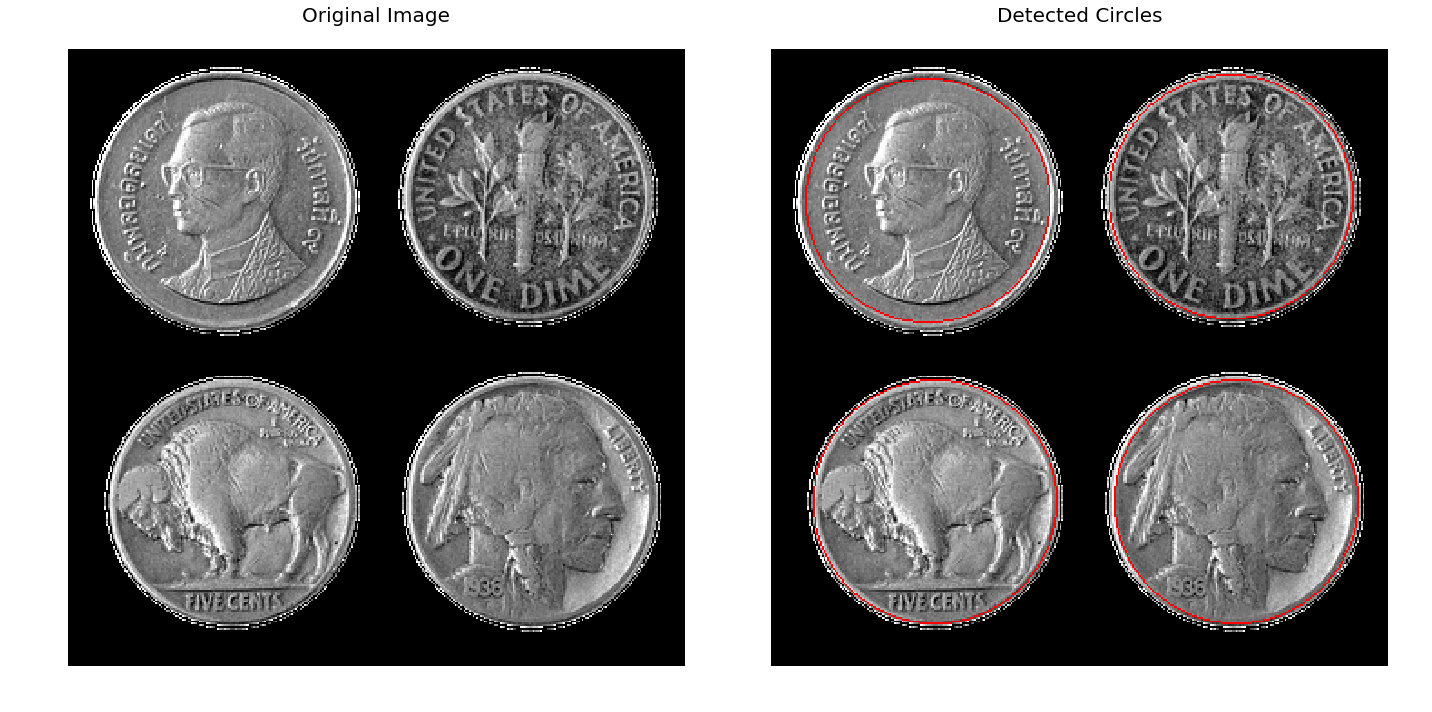

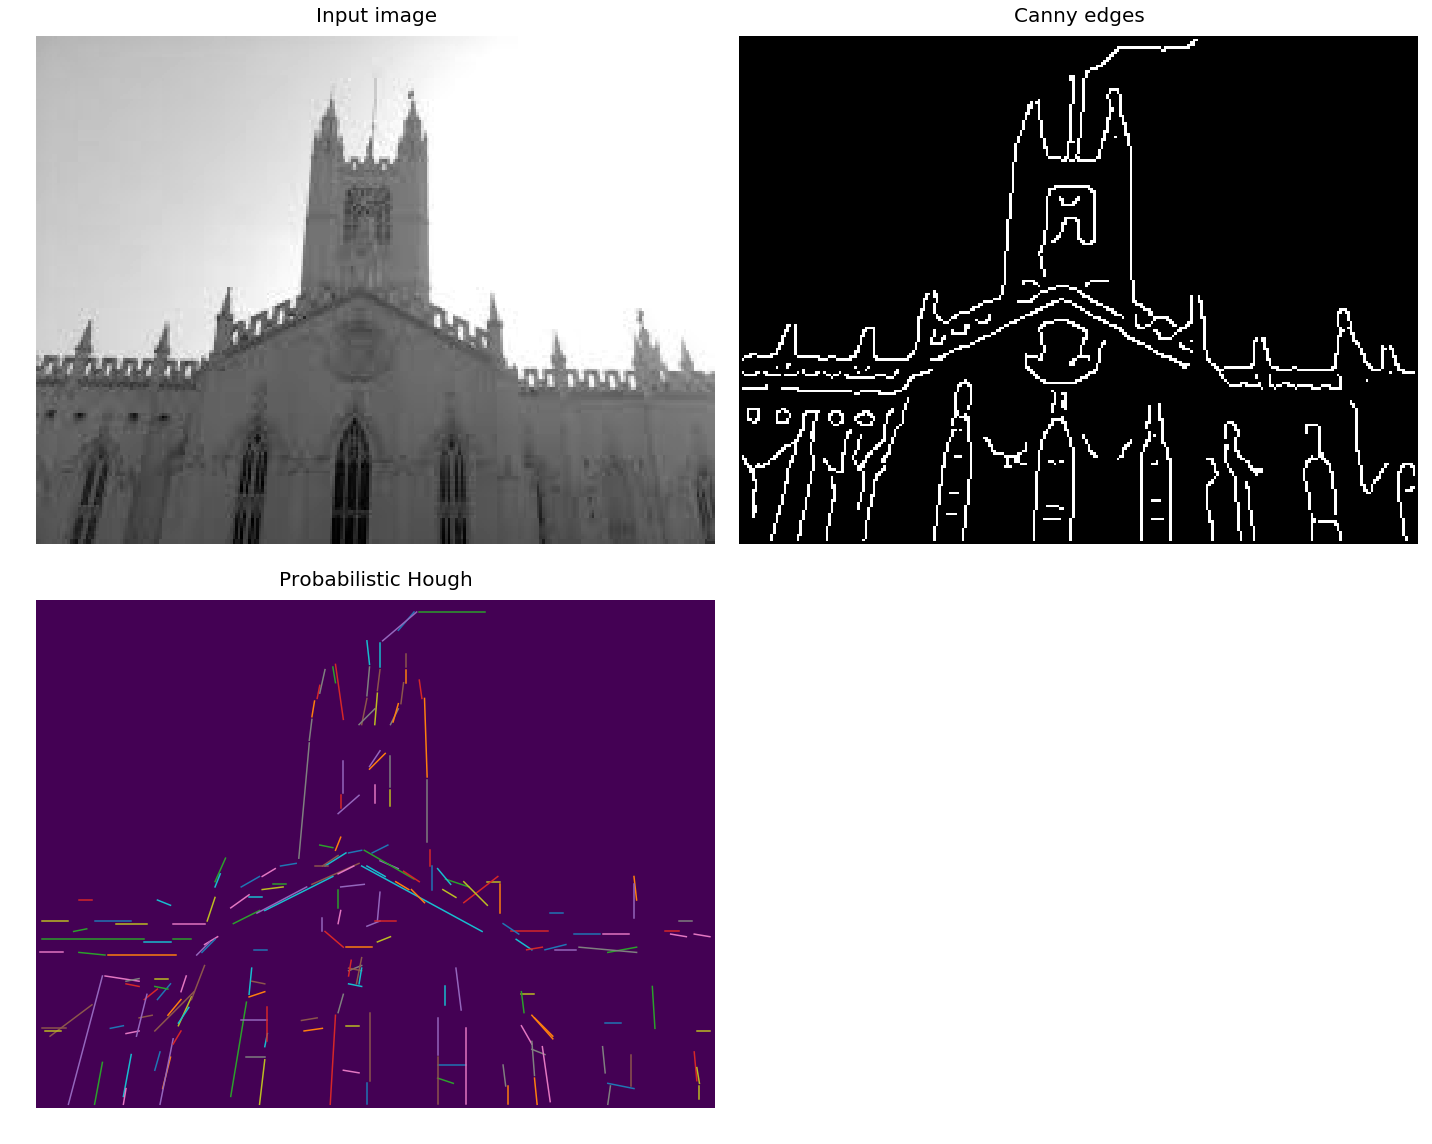

In [31]:
import numpy as np

from skimage.transform import (hough_line, hough_line_peaks, probabilistic_hough_line, hough_circle, hough_circle_peaks)
from skimage.draw import circle_perimeter
from skimage.feature import canny
from skimage import data
from skimage.io import imread, imsave
from skimage.color import rgb2gray, gray2rgb
from skimage.morphology import skeletonize
from skimage import img_as_float

import matplotlib.pyplot as plt
from matplotlib import cm


# Constructing test image
image = np.zeros((100, 100))
idx = np.arange(25, 75)
image[idx[::-1], idx] = 255
image[idx, idx] = 255

image = rgb2gray(imread('../new images/triangle.png')) #skeletonize()
#image = skeletonize()
#imsave('../new images/triangle.png', image)

# Classic straight-line Hough transform
h, theta, d = hough_line(image)

# Generating figure 1
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image', size=20)
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + h),
             extent=[10*np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap=cm.hot, aspect=1/1.5)
ax[1].set_title('Hough transform', size=20)
ax[1].set_xlabel('Angles (degrees)', size=20)
ax[1].set_ylabel('Distance (pixels)', size=20)
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
    ax[2].plot((0, image.shape[1]), (y0, y1), '-r')
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines', size=20)

hough_radii = np.arange(50, 100, 2)
hough_res = hough_circle(image, hough_radii)

# Select the most prominent 5 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=6)

image = gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius)
    image[circy, circx] = (0.9, 0.2, 0.2)

ax[3].imshow(image, cmap=plt.cm.gray)
ax[3].set_axis_off()
ax[3].set_title('Detected Circles', size=20)

plt.tight_layout()
plt.show()

image = rgb2gray(imread('../new images/coins.png'))

fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_axis_off()
ax[0].set_title('Original Image', size=20)

hough_radii = np.arange(65, 75, 1)
hough_res = hough_circle(image, hough_radii)

# Select the most prominent 5 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=4)

image = gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius)
    image[circy, circx] = (1, 0, 0)

ax[1].imshow(image, cmap=plt.cm.gray)
ax[1].set_axis_off()
ax[1].set_title('Detected Circles', size=20)

plt.tight_layout()
plt.show()


# Line finding using the Probabilistic Hough Transform
image = rgb2gray(imread('../my images/cath.jpg')) #data.camera()
edges = canny(image, 2, 1/255, 20/255)
lines = probabilistic_hough_line(edges, threshold=10, line_length=5, line_gap=3)

# Generating figure 2
fig, axes = plt.subplots(2, 2, figsize=(20, 16), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image', size=20)

ax[1].imshow(edges, cmap=cm.gray)
ax[1].set_title('Canny edges', size=20)

ax[2].imshow(edges * 0)
for line in lines:
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_title('Probabilistic Hough', size=20)

for a in ax:
    a.set_axis_off()

plt.axis('off')
plt.tight_layout()
plt.show()

In [25]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.data import astronaut
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries, find_boundaries
from skimage.util import img_as_float

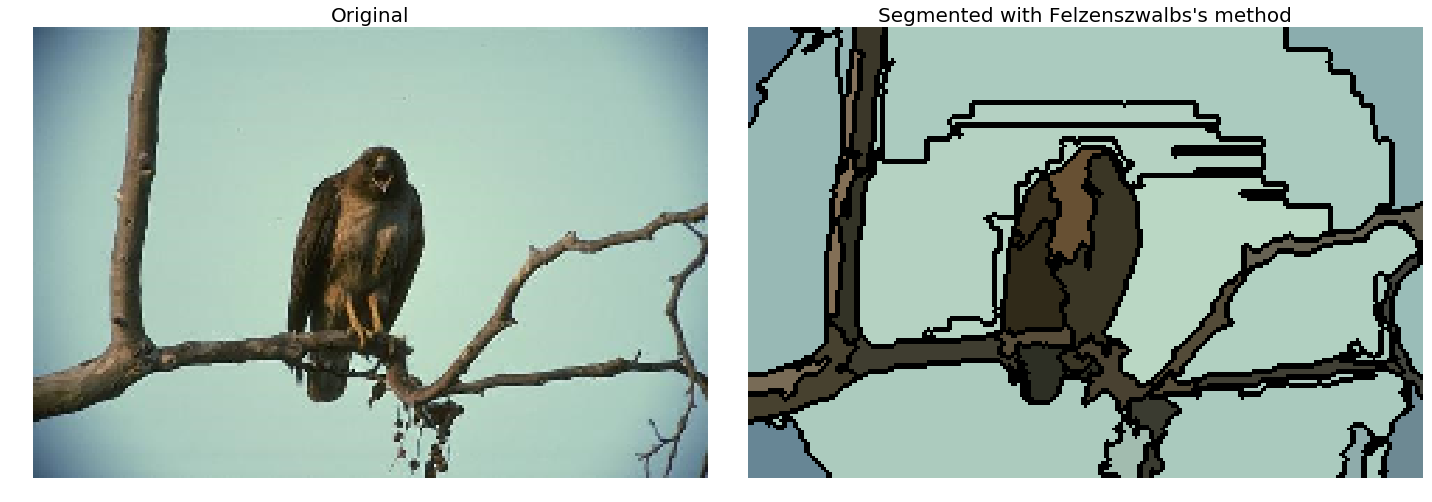

C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


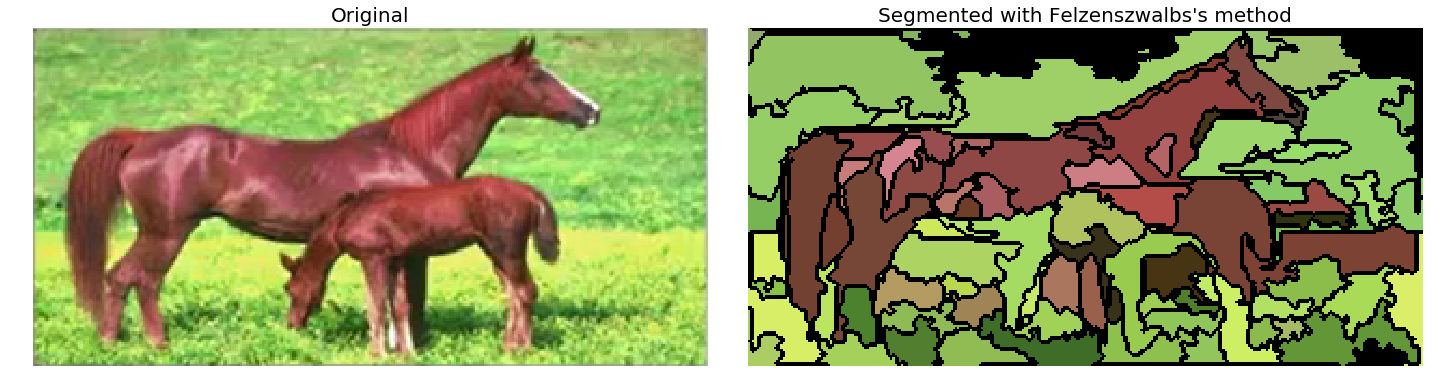

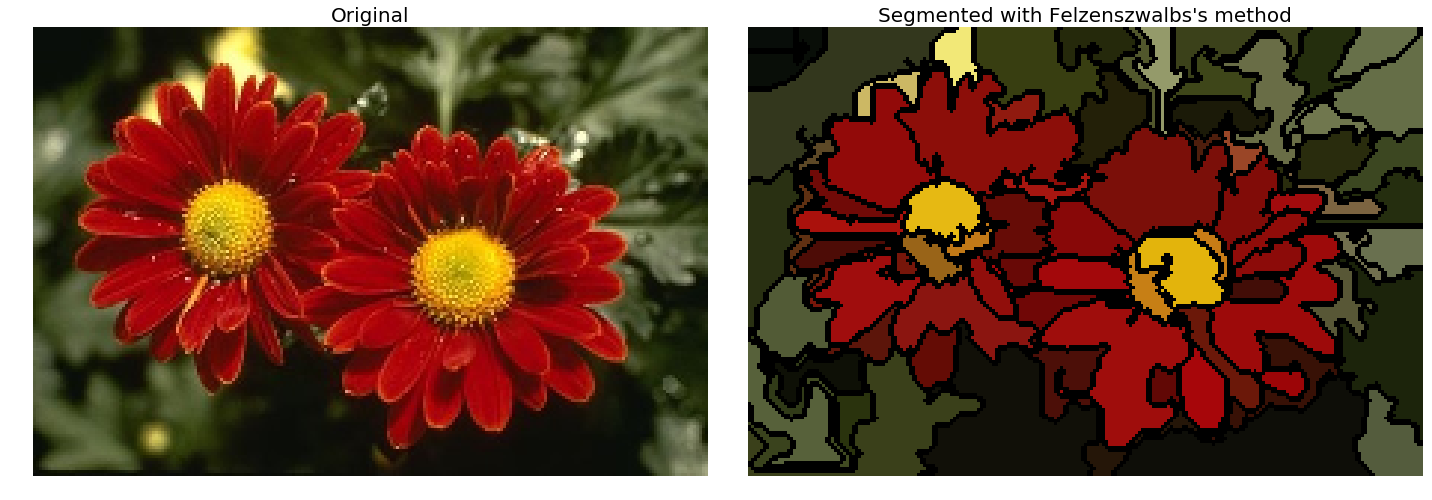

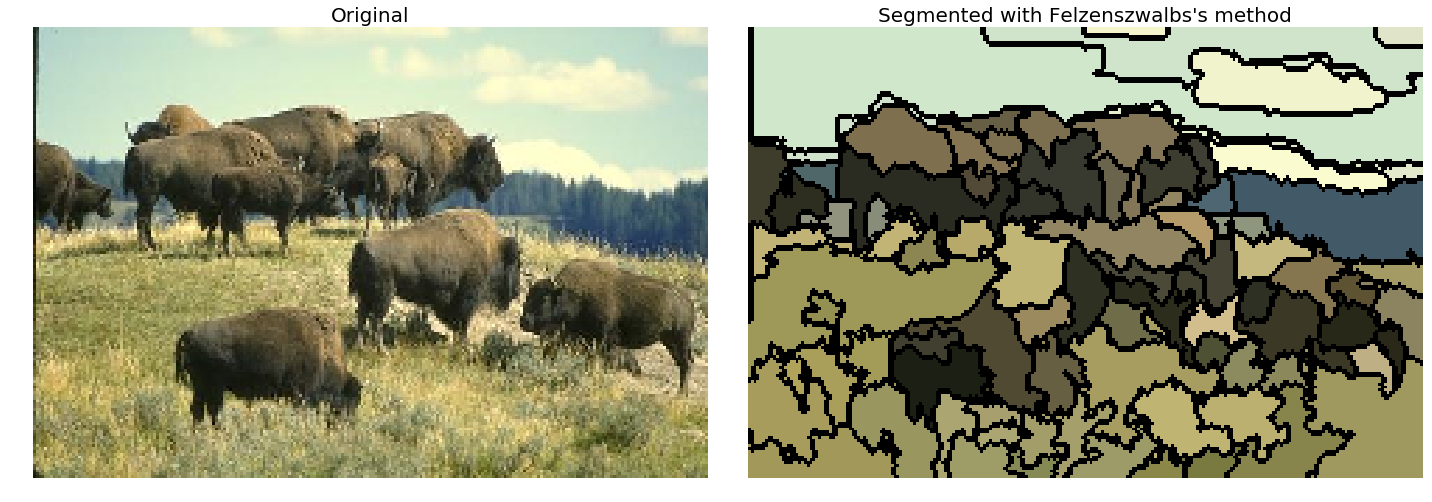

In [35]:
from matplotlib.colors import LinearSegmentedColormap
for imfile in ['../images/eagle.png', '../images/horses.png', '../images/flowers.png', '../images/bisons.png']:
    img = img_as_float(imread(imfile)[::2, ::2, :3])
    plt.figure(figsize=(20,10))
    segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=100) #300
    borders = find_boundaries(segments_fz)
    unique_colors = np.unique(segments_fz.ravel())
    segments_fz[borders] = -1 #len(unique_colors)
    colors = [np.zeros(3)]
    for color in unique_colors:
        colors.append(np.mean(img[segments_fz == color], axis=0))    
    cm = LinearSegmentedColormap.from_list('pallete', colors, N=len(colors))
    plt.subplot(121)
    plt.imshow(img)
    plt.title('Original', size=20)
    plt.axis('off') 
    plt.subplot(122)
    plt.imshow(segments_fz, cmap=cm)
    plt.title('Segmented with Felzenszwalbs\'s method', size=20)
    plt.axis('off')   
    plt.tight_layout()
    plt.show()

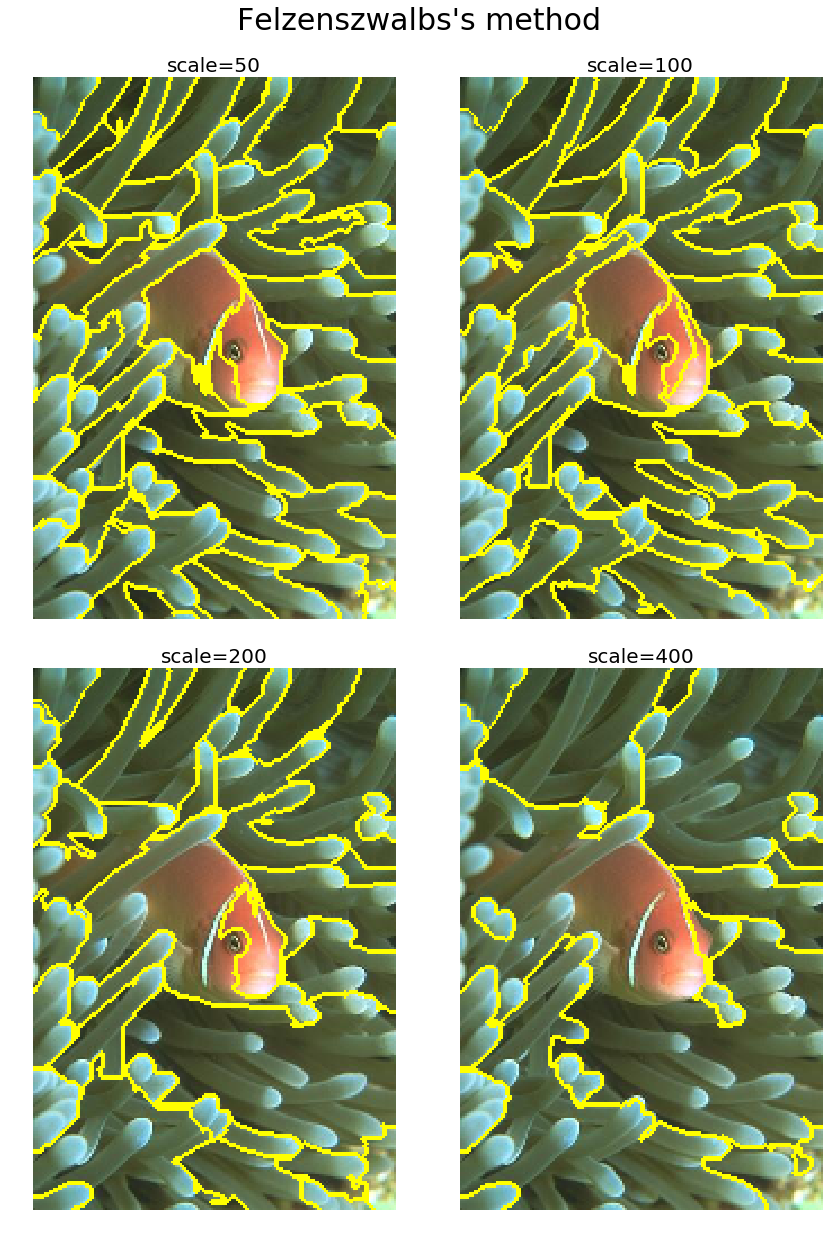

In [36]:
def plot_image(img, title):
    plt.imshow(img)
    plt.title(title, size=20)
    plt.axis('off')    
    
img = imread('../images/fish.jpg')[::2, ::2, :3] #img_as_float(astronaut()[::2, ::2])

plt.figure(figsize=(12,18))
i = 1
for scale in [50, 100, 200, 400]:
    plt.subplot(2,2,i)
    segments_fz = felzenszwalb(img, scale=scale, sigma=0.5, min_size=200)
    plot_image(mark_boundaries(img, segments_fz), 'scale=' + str(scale))
    i += 1
plt.suptitle('Felzenszwalbs\'s method', size=30)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
plt.figure(figsize=(12,18))
i = 1
for compactness in [0.1, 1, 10, 100]:
    plt.subplot(2,2,i)
    segments_slic = slic(img, n_segments=250, compactness=compactness, sigma=1)
    plot_image(mark_boundaries(img, segments_slic), 'compactness=' + str(compactness))
    i += 1
plt.suptitle('SLIC', size=30)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
plt.figure(figsize=(12,18))
i = 1
for max_dist in [5, 100]:
    for ratio in [0.3, 0.7]:
        plt.subplot(2,2,i)
        segments_quick = quickshift(img, kernel_size=3, max_dist=max_dist, ratio=ratio)
        plot_image(mark_boundaries(img, segments_quick), 'max_dist=' + str(max_dist) + ', ratio=' + str(ratio))
        i += 1
plt.suptitle('Quickshift', size=30)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
gradient = sobel(rgb2gray(img))
plt.figure(figsize=(12,18))
i = 1
for markers in [50, 200]:
    for compactness in [0.01, 0.001]:
        plt.subplot(2,2,i)
        segments_watershed = watershed(gradient, markers=markers, compactness=compactness)
        plot_image(mark_boundaries(img, segments_watershed), 'markers=' + str(markers) + '.compactness=' + str(compactness))
        i += 1
plt.suptitle('Compact watershed', size=30)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
from skimage.color import gray2rgb

img = imread('../images/fish.jpg') #[::2, ::2, :3] #img_as_float(astronaut()[::2, ::2])
img = gray2rgb(img)

segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=50) #50
segments_slic = slic(img, n_segments=25, compactness=0.1, sigma=1)
segments_quick = quickshift(img, kernel_size=3, max_dist=20, ratio=0.5)
gradient = sobel(rgb2gray(img))
segments_watershed = watershed(gradient, markers=10, compactness=0.001)

print("Felzenszwalb number of segments: {}".format(len(np.unique(segments_fz))))
print('SLIC number of segments: {}'.format(len(np.unique(segments_slic))))
print('Quickshift number of segments: {}'.format(len(np.unique(segments_quick))))

fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

segments_fz[find_boundaries(segments_fz)]=-1
ax[0, 0].imshow(segments_fz, cmap='jet')
ax[0, 0].set_title("Felzenszwalbs's method")
segments_slic[find_boundaries(segments_slic)]=-1
ax[0, 1].imshow(segments_slic, cmap='jet') #mark_boundaries(img, segments_slic))
ax[0, 1].set_title('SLIC')
segments_quick[find_boundaries(segments_quick)]=-1
ax[1, 0].imshow(segments_quick, cmap='jet') #mark_boundaries(img, segments_quick))
ax[1, 0].set_title('Quickshift')
segments_watershed[find_boundaries(segments_watershed)]=-1
ax[1, 1].imshow(segments_watershed, cmap='jet') #mark_boundaries(img, segments_watershed))
ax[1, 1].set_title('Compact watershed')

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour

img = data.astronaut()
img_gray = rgb2gray(img)

s = np.linspace(0, 2*np.pi, 400)
x = 240 + 230*np.cos(s)
y = 300 + 230*np.sin(s)
init = np.array([x, y]).T

i = 1
plt.figure(figsize=(20,20))
for max_it in [20, 30, 50, 1000]:
    snake = active_contour(gaussian(img_gray, 3), init, w_line=-1, w_edge=1, alpha=0.015, beta=10, gamma=0.001, 
                           max_px_move=5, max_iterations=max_it)
    plt.subplot(2,2,i)
    plt.imshow(img)
    plt.plot(init[:, 0], init[:, 1], '--b', lw=3)
    plt.plot(snake[:, 0], snake[:, 1], '-r', lw=3)
    plt.axis('off')
    plt.title('max_iteration=' + str(max_it), size=20)
    i += 1
plt.tight_layout()
plt.show()

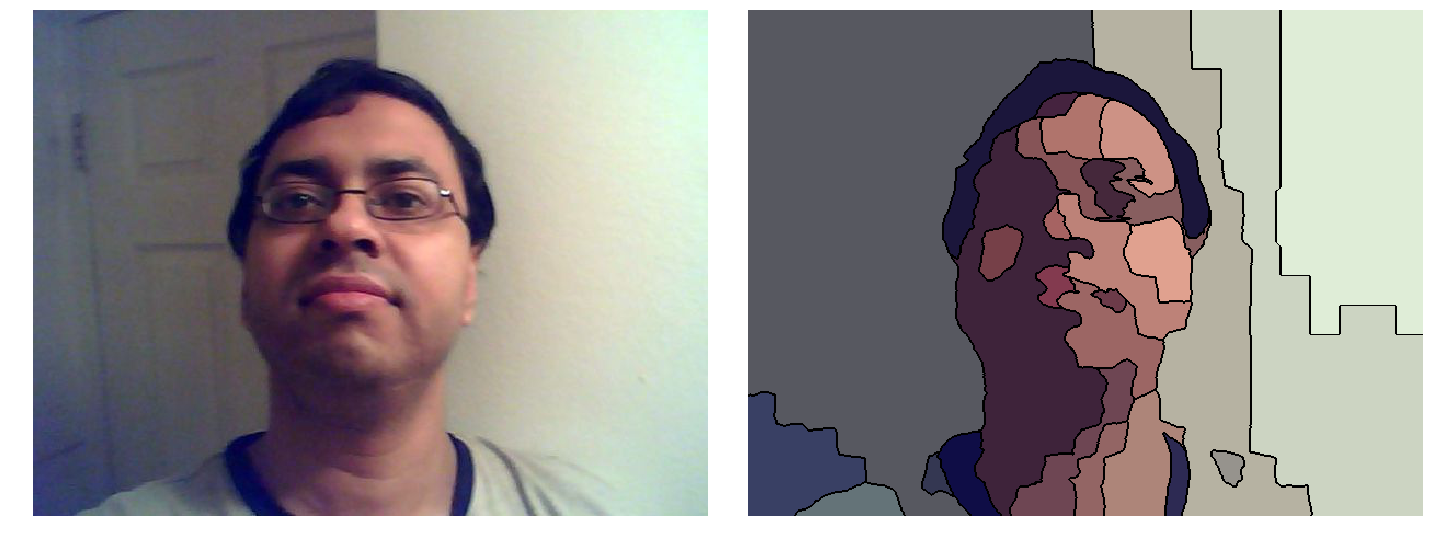

In [37]:
from skimage import data, io, segmentation, color
from skimage.future import graph
import numpy as np


def _weight_mean_color(graph, src, dst, n):
    """Callback to handle merging nodes by recomputing mean color.

    The method expects that the mean color of `dst` is already computed.

    Parameters
    ----------
    graph : RAG
        The graph under consideration.
    src, dst : int
        The vertices in `graph` to be merged.
    n : int
        A neighbor of `src` or `dst` or both.

    Returns
    -------
    data : dict
        A dictionary with the `"weight"` attribute set as the absolute
        difference of the mean color between node `dst` and `n`.
    """

    diff = graph.node[dst]['mean color'] - graph.node[n]['mean color']
    diff = np.linalg.norm(diff)
    return {'weight': diff}


def merge_mean_color(graph, src, dst):
    """Callback called before merging two nodes of a mean color distance graph.

    This method computes the mean color of `dst`.

    Parameters
    ----------
    graph : RAG
        The graph under consideration.
    src, dst : int
        The vertices in `graph` to be merged.
    """
    graph.node[dst]['total color'] += graph.node[src]['total color']
    graph.node[dst]['pixel count'] += graph.node[src]['pixel count']
    graph.node[dst]['mean color'] = (graph.node[dst]['total color'] /
                                     graph.node[dst]['pixel count'])


img = imread('../my images/me12.jpg') #data.coffee()
labels = segmentation.slic(img, compactness=30, n_segments=400)
g = graph.rag_mean_color(img, labels)

labels2 = graph.merge_hierarchical(labels, g, thresh=35, rag_copy=False,
                                   in_place_merge=True,
                                   merge_func=merge_mean_color,
                                   weight_func=_weight_mean_color)

out = color.label2rgb(labels2, img, kind='avg')
out = segmentation.mark_boundaries(out, labels2, (0, 0, 0))
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(img)
plt.axis('off')
plt.subplot(122)
plt.imshow(out)
plt.axis('off')
plt.tight_layout()
plt.show()

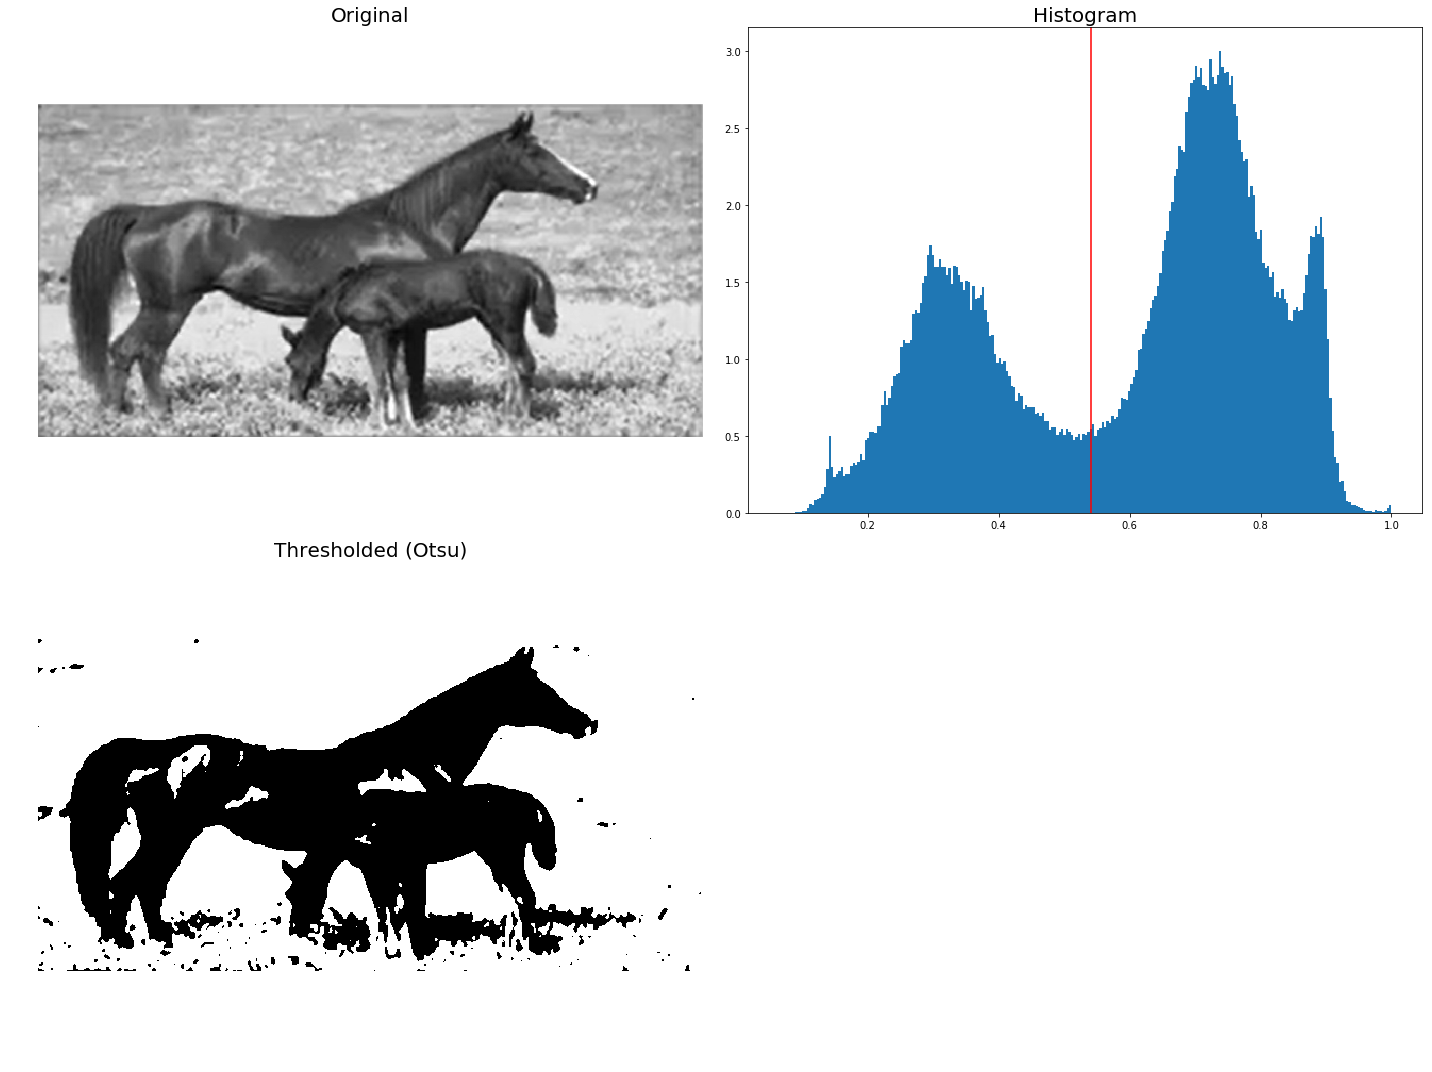

In [13]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu


image =  rgb2gray(imread('../images/horses.png')) #data.camera()
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
ax = axes.ravel()
ax[0] = plt.subplot(2, 2, 1)
ax[1] = plt.subplot(2, 2, 2)
ax[2] = plt.subplot(2, 2, 3, sharex=ax[0], sharey=ax[0])
ax[3] = plt.subplot(2, 2, 4, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original', size=20)
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256, normed=True)
ax[1].set_title('Histogram', size=20)
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded (Otsu)', size=20)
ax[2].axis('off')

ax[3].axis('off')

plt.tight_layout()
plt.show()

In [309]:
import SimpleITK as sitk
def show_image(img, title=None):
    nda = sitk.GetArrayViewFromImage(img)
    #nda = np.transpose(nda, (1, 2, 0))
    #print(nda.shape)
    plt.imshow(nda, cmap='gray')   
    plt.axis('off')
    if(title):
        plt.title(title, size=20)

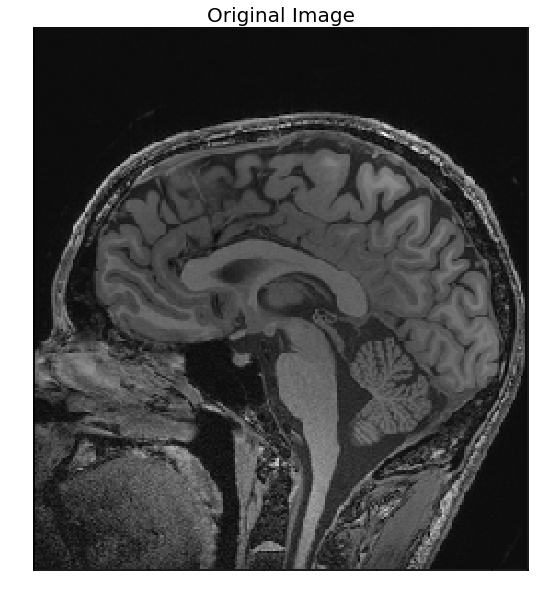

In [310]:
#img_T1 = sitk.ReadImage('../new images/mri_T1.png') #sitk.Cast(, sitk.sitkUInt8)
#img = imread('../images/pepper.jpg')
img = 255*rgb2gray(imread('../new images/mri_T1.png'))
#img = np.transpose(img, (2, 0, 1))
img_T1 = sitk.GetImageFromArray(img) 
img_T1_255 = sitk.Cast(sitk.RescaleIntensity(img_T1), sitk.sitkUInt8)
#print(img_T1.GetSize())
#nda = sitk.GetArrayViewFromImage(img_T1)
#print(nda.shape, nda.ndim)
plt.figure(figsize=(10,10))
show_image(img_T1, "Original Image")

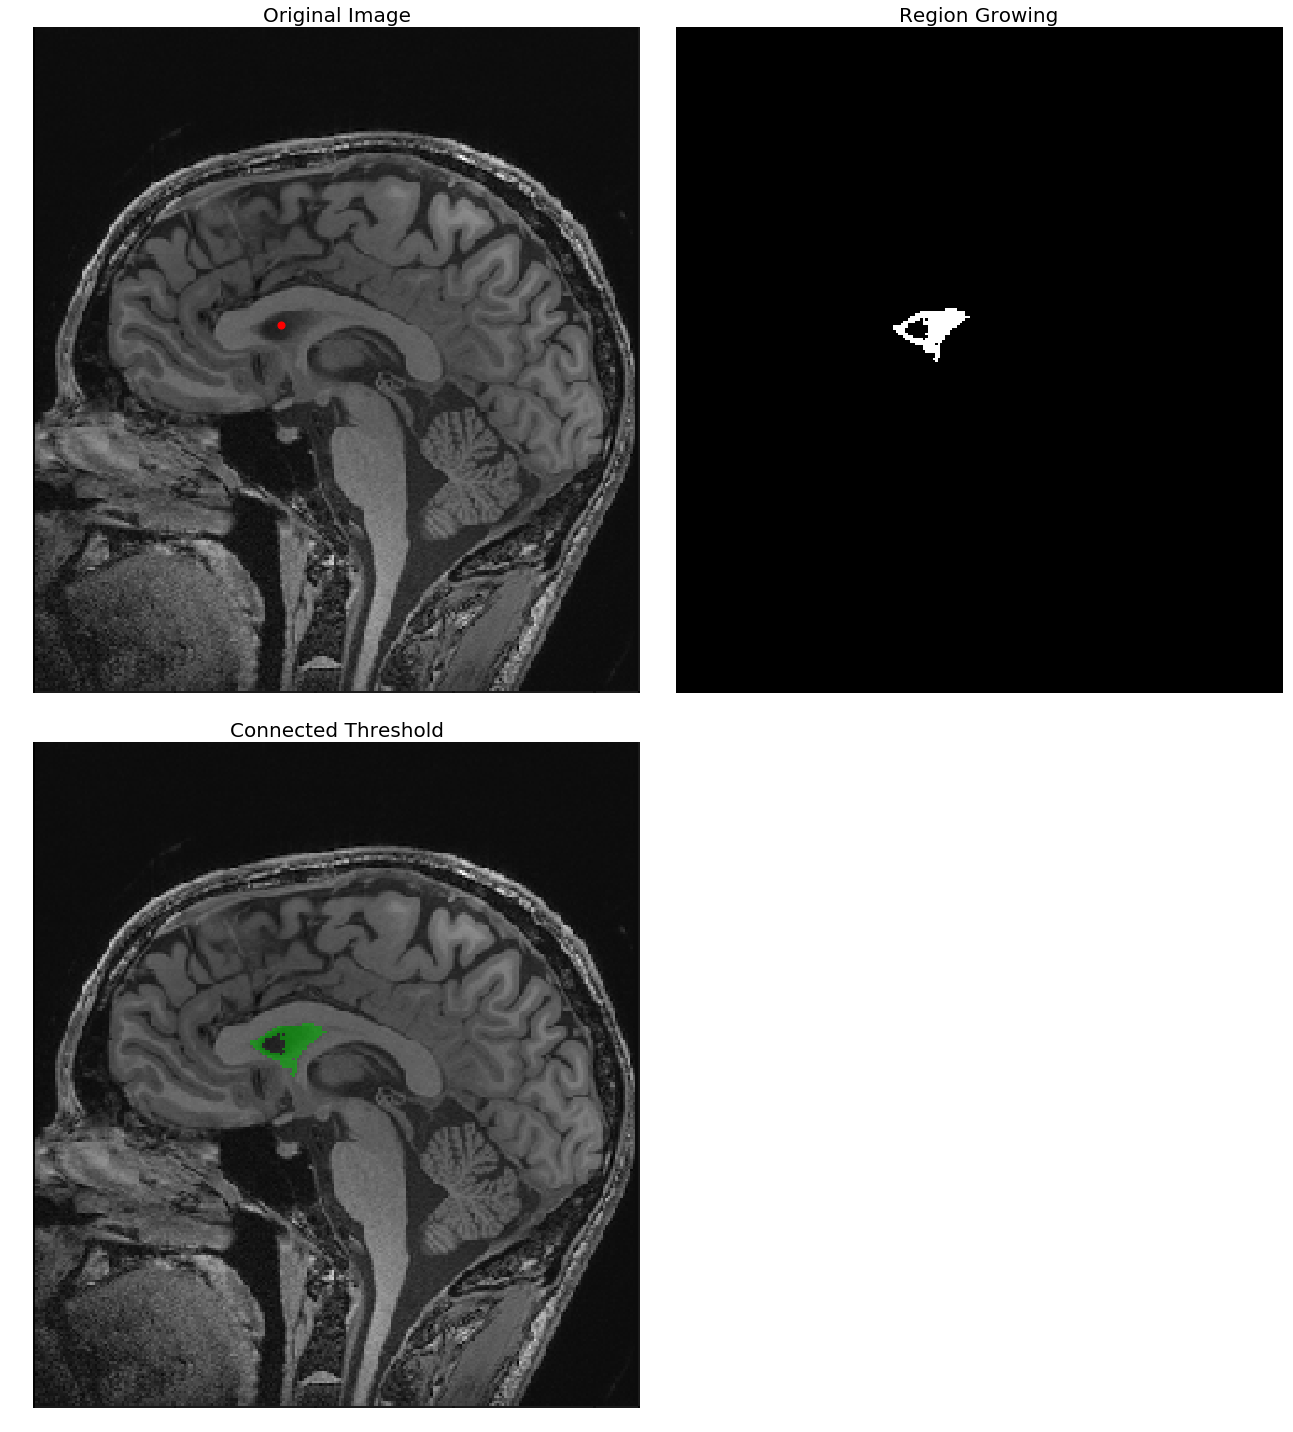

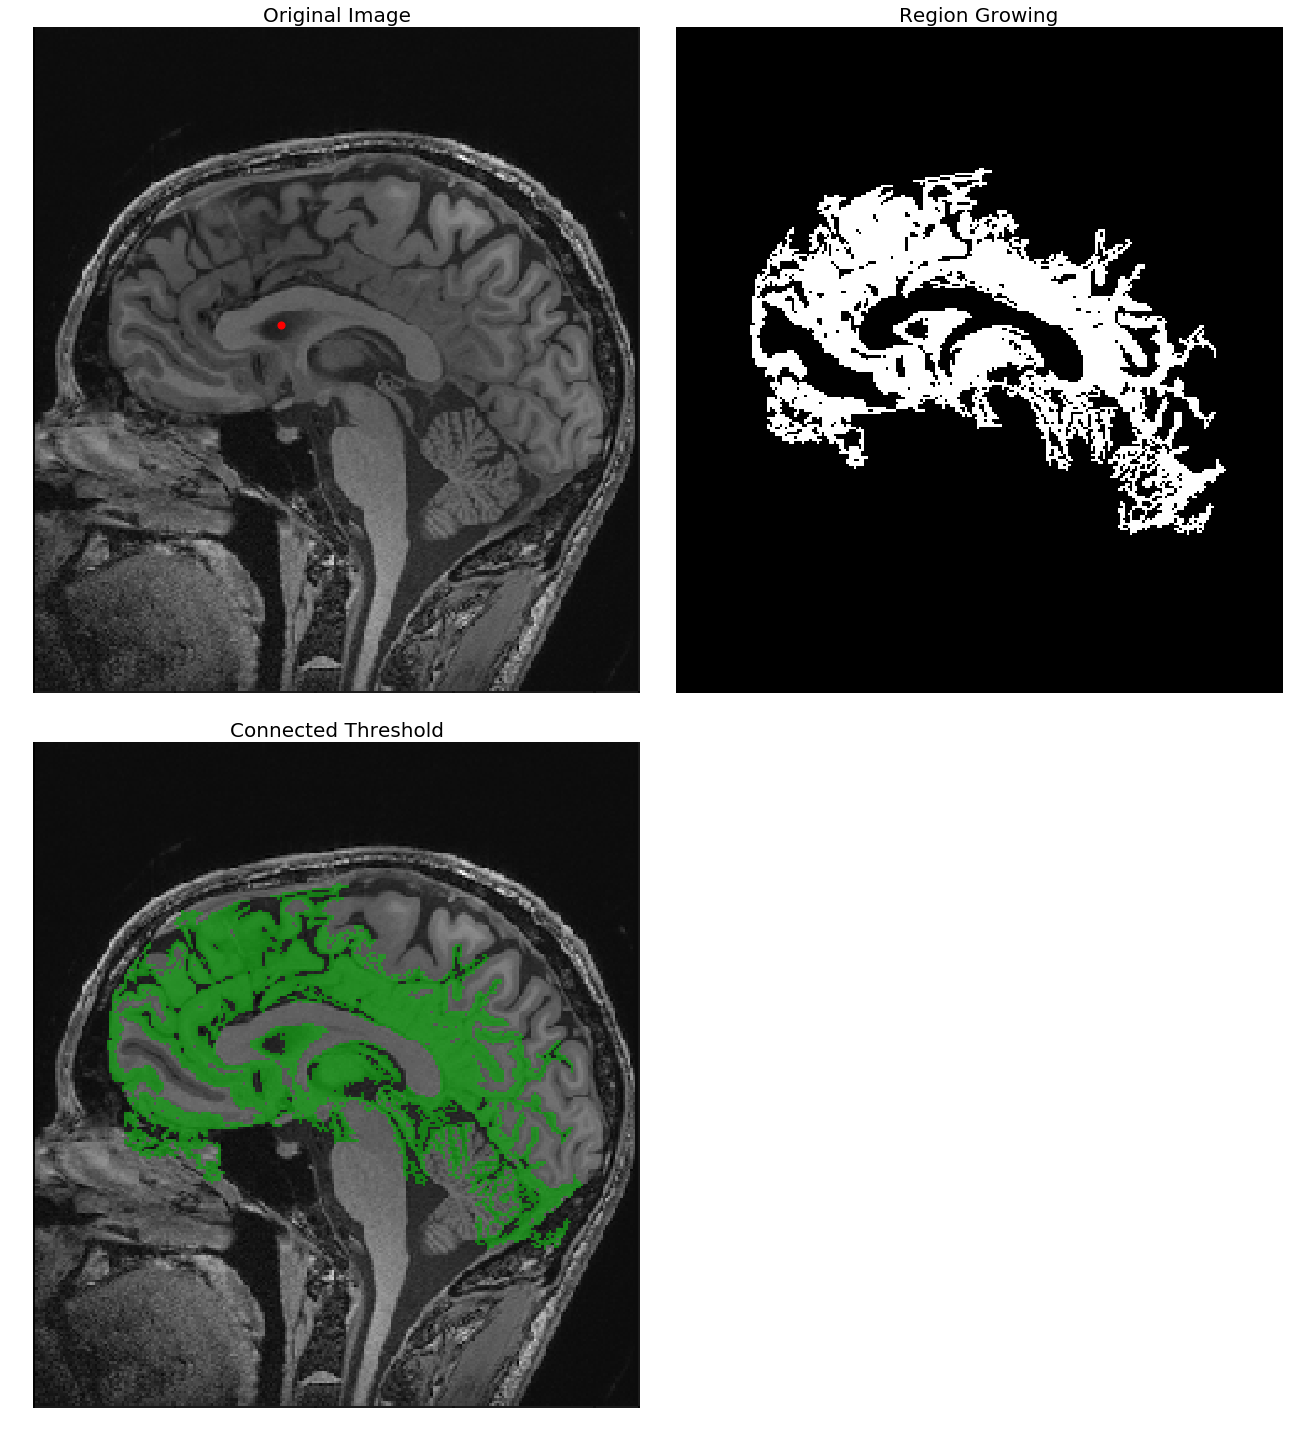

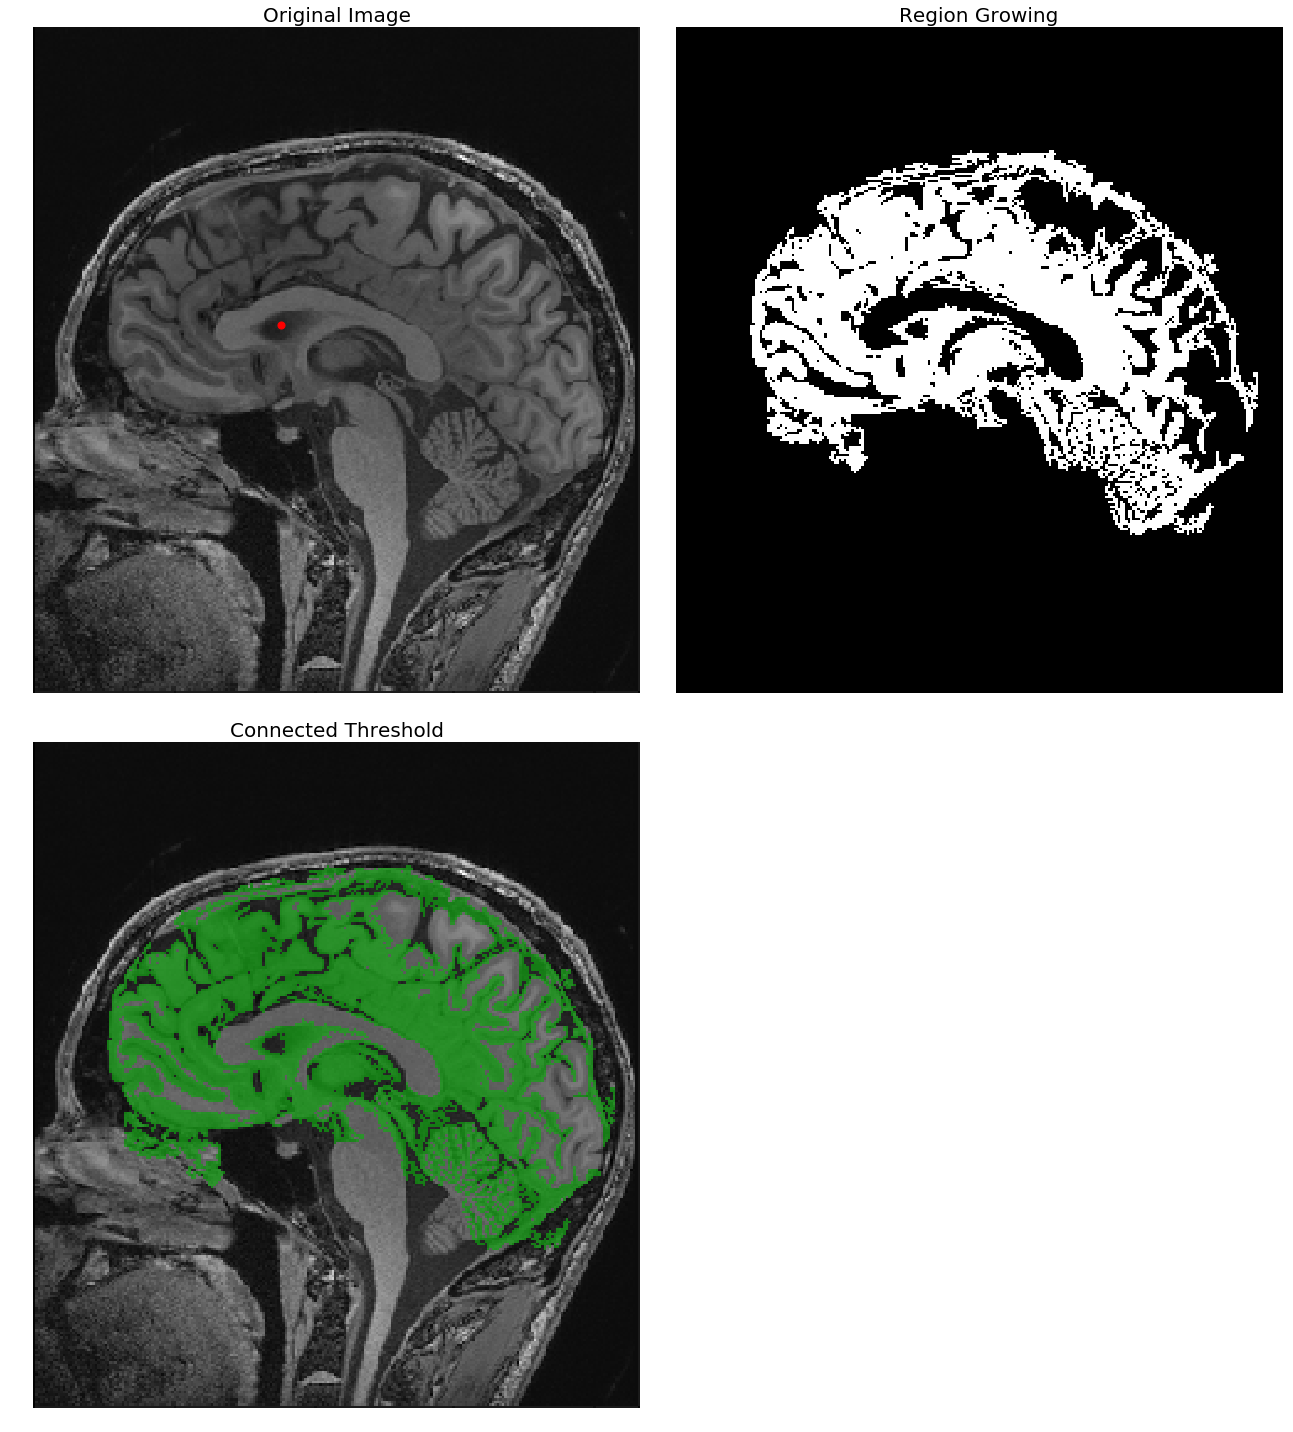

In [313]:
seed = (100,120)
for upper in [80, 85, 90]:
    plt.figure(figsize=(18,20))
    plt.subplot(221)
    show_image(img_T1, "Original Image")
    plt.scatter(seed[0], seed[1], color='red', s=50)
    plt.subplot(222)
    seg = sitk.ConnectedThreshold(img_T1, seedList=[seed], lower=40, upper=upper)
    show_image(seg, "Region Growing")
    plt.subplot(223)
    show_image(sitk.LabelOverlay(img_T1_255, seg), "Connected Threshold")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

252 1 96.8555160204


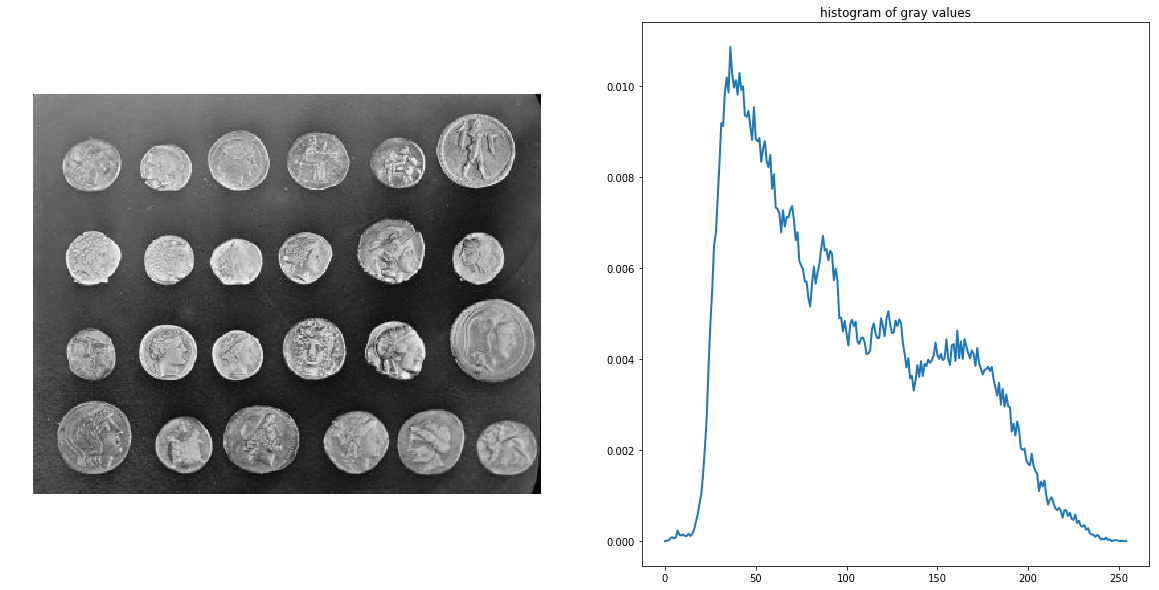

In [61]:
import numpy as np
import matplotlib.pyplot as plt

#from skimage import data
from skimage.io import imread
from skimage.color import rgb2gray

#coins = (255*rgb2gray(imread('../new images/coins2.jpg'))).astype(np.uint8) 
coins = data.coins()
print(np.max(coins), np.min(coins), np.mean(coins))
hist = np.histogram(coins, bins=np.arange(0, 256), normed=True)
#print(hist)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(coins, cmap=plt.cm.gray, interpolation='nearest')
axes[0].axis('off')
axes[1].plot(hist[1][:-1], hist[0], lw=2)
axes[1].set_title('histogram of gray values')
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

axes[0].imshow(coins < 240, cmap=plt.cm.gray, interpolation='nearest')
axes[0].set_title('coins < 240')

axes[1].imshow(coins < 250 , cmap=plt.cm.gray, interpolation='nearest')
axes[1].set_title('coins < 250')

for a in axes:
    a.axis('off')

plt.tight_layout()
plt.show()

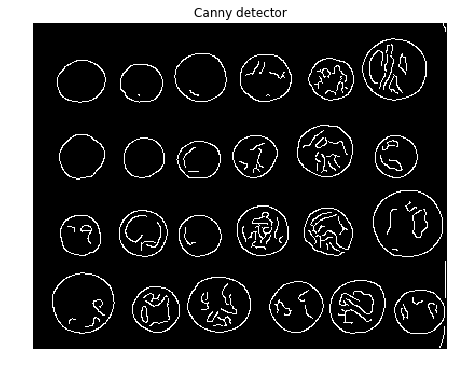

In [63]:
from skimage.feature import canny

edges = canny(coins, sigma=2)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(edges, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('Canny detector')
ax.axis('off')
plt.show()

In [64]:
canny?

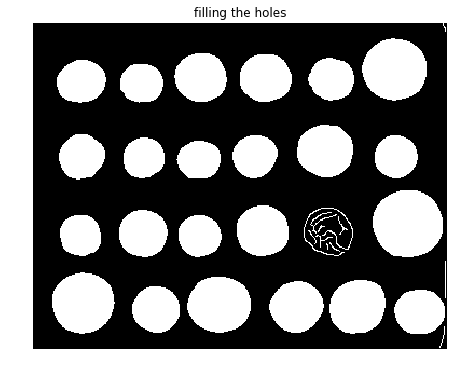

In [65]:
from scipy import ndimage as ndi

fill_coins = ndi.binary_fill_holes(edges)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(fill_coins, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('filling the holes')
ax.axis('off')
plt.show()

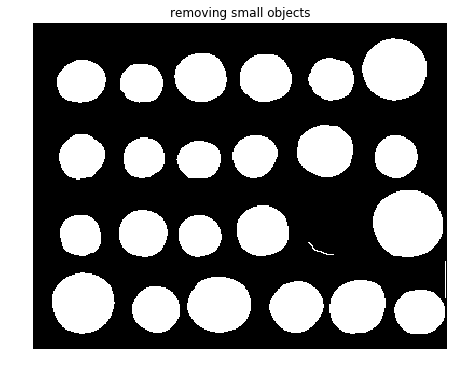

In [66]:
from skimage import morphology

coins_cleaned = morphology.remove_small_objects(fill_coins, 21)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(coins_cleaned, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('removing small objects')
ax.axis('off')
plt.show()

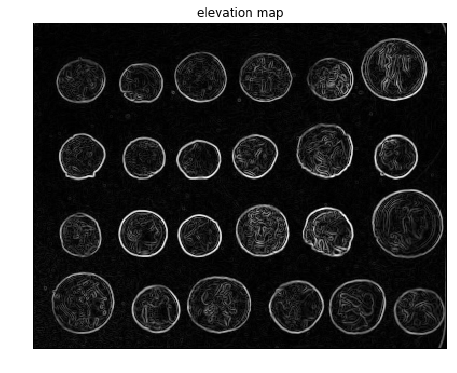

(303, 384)


In [67]:
from skimage.filters import sobel

elevation_map = sobel(coins)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(elevation_map, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('elevation map')
ax.axis('off')
plt.show()
print(elevation_map.shape)

2 0


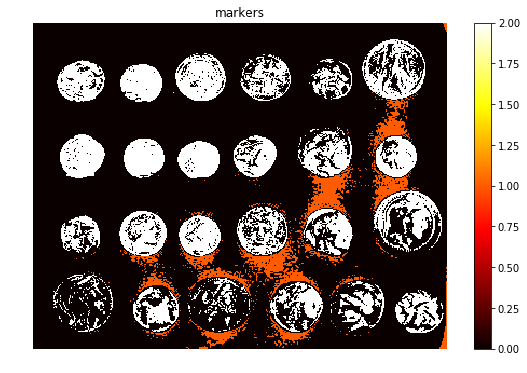

In [22]:
markers = np.zeros_like(coins)
markers[coins < 30] = 1
markers[coins > 150] = 2
print(np.max(markers), np.min(markers))

fig, ax = plt.subplots(figsize=(10, 6))
a = ax.imshow(markers, cmap=plt.cm.hot, interpolation='nearest')
plt.colorbar(a)
ax.set_title('markers')
ax.axis('off')
plt.show()

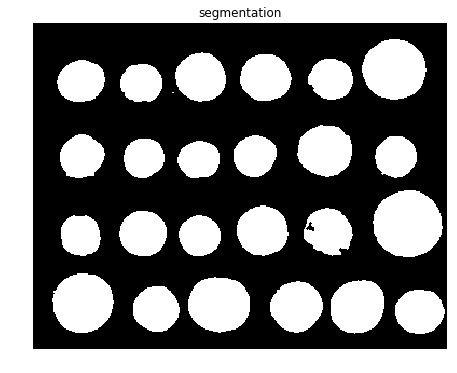

In [23]:
segmentation = morphology.watershed(elevation_map, markers)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(segmentation, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('segmentation')
ax.axis('off')
plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]


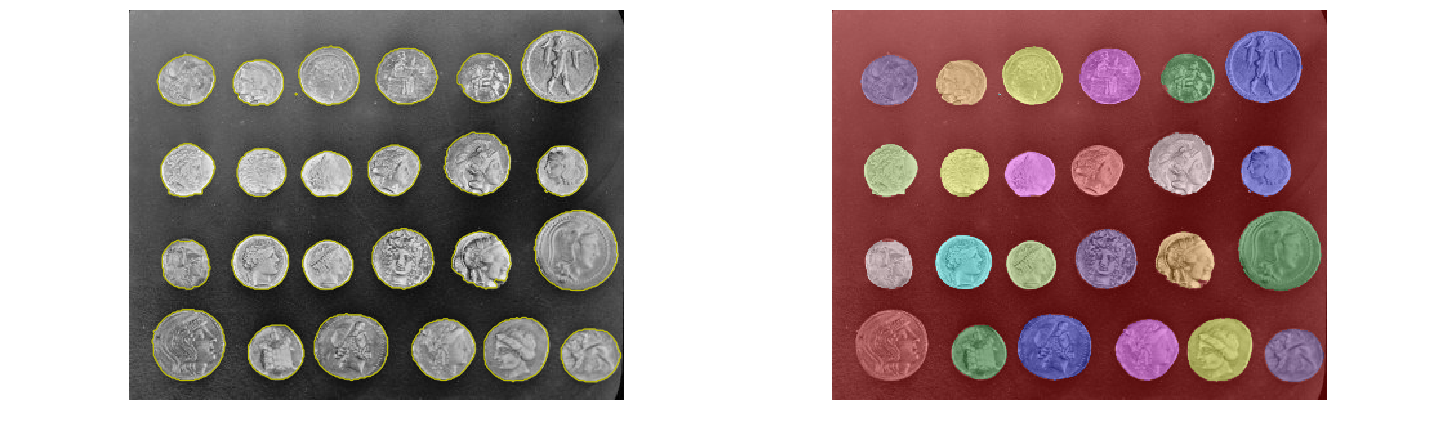

In [24]:
from skimage.color import label2rgb

segmentation = ndi.binary_fill_holes(segmentation - 1)
labeled_coins, _ = ndi.label(segmentation)
print(np.unique(labeled_coins))
image_label_overlay = label2rgb(labeled_coins, image=coins)

fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)
axes[0].imshow(coins, cmap=plt.cm.gray, interpolation='nearest')
axes[0].contour(segmentation, [0.5], linewidths=1.2, colors='y')
axes[1].imshow(image_label_overlay, interpolation='nearest')

for a in axes:
    a.axis('off')

plt.tight_layout()

plt.show()